# Open CV Tutorial

## 1. Image processing

### 1.1 Import Image with OpenCV
import image tansfer to gray scale and show it.
Press "S" to save the new image or press "Ese" to close window without saving it. 

In [1]:
import numpy as np
import cv2
img = cv2.imread('Example_photo/autobahn3.jpg',0)
cv2.imshow('image',img)

k = cv2.waitKey(0) & 0xFF

if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('autobahn3_gray.png',img)
    cv2.destroyAllWindows()

### 1.2 Import Image with Matplotlib

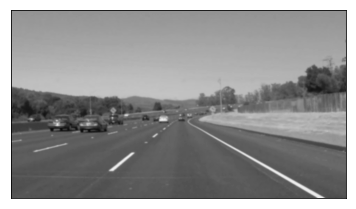

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('Example_photo/autobahn3.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### 1.3 Hough Line Transform

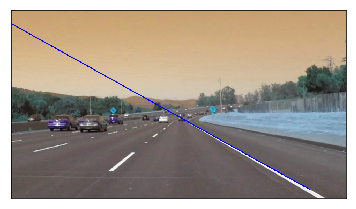

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('Example_photo/autobahn3.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('autobahn3_Hough.jpg',img)

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

### 1.4 Reconition 

In [5]:
# import the necessary packages
import numpy as np
import cv2
 
# load the games image
image = cv2.imread("Example_photo/games.jpg")
 
# find the red color game in the image
upper = np.array([65, 65, 255])
lower = np.array([0, 0, 200])
mask = cv2.inRange(image, lower, upper)
 
# find contours in the masked image and keep the largest one
(_, cnts, _) = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
c = max(cnts, key=cv2.contourArea)
 
# approximate the contour
peri = cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, 0.05 * peri, True)
 
# draw a green bounding box surrounding the red game
cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
cv2.imshow("Image", image)
cv2.waitKey(0)

255

## 2. Video Processing

### 2.1 Import Video from file

In [1]:
import numpy as np
import cv2

cap = cv2.VideoCapture('Example_video/challenge.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## 3. UI In Python 

### 3.1 Draw Function 

In [7]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
# Draw a Rectangle 
cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
#Draw a Circle
cv2.circle(img,(447,63), 63, (0,0,255), -1)
#show the image
cv2.imshow("Image", img)
cv2.waitKey(0)

255

### 3.2 Mouse Brush 

In [11]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break

cv2.destroyAllWindows()

### 3.3 Bar

In [12]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()